In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import altair as alt
from IPython.display import display

In [2]:
votes_data = pd.read_csv(r'Votes-count-percentage.csv')

In [3]:
votes_data.columns

Index(['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6',
       'day7', 'total_votes', 'day1_%', 'day2_%', 'day3_%', 'day4_%', 'day5_%',
       'day6_%', 'day7_%'],
      dtype='object')

**Dataset Description:**
1. **'proposal_title':** Title of the proposal.
2. **'day1' through 'day7':** Number of votes received on each of the seven days.
3. **'total_votes':** Total number of votes received across all days.
4. **'day1_%' through 'day7_%':** Percentage of total votes received on each day.

In [4]:
votes_data

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_votes,day1_%,day2_%,day3_%,day4_%,day5_%,day6_%,day7_%
0,[Non-Constitutional]: Arbitrum Stable Treasury...,7836,5875,4003,2534,3591,1450,2784,28073,27.91,20.93,14.26,9.03,12.79,5.17,9.92
1,Procurement Framework | Security : Non-Constit...,12251,9964,7240,8350,7124,3234,2346,50509,24.26,19.73,14.33,16.53,14.10,6.40,4.64
2,Proposal to Backfund Successful STIP Proposals,16712,8531,5042,4857,3335,4154,2706,45337,36.86,18.82,11.12,10.71,7.36,9.16,5.97
3,Consolidate Security Proposals into a RFP Process,10848,8725,10083,9104,5558,3424,2274,50016,21.69,17.44,20.16,18.20,11.11,6.85,4.55
4,UniDex STIP Proposal - Round 1,9902,4992,5396,3432,2810,2333,3637,32502,30.47,15.36,16.60,10.56,8.65,7.18,11.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Proposal: Activate support for account abstrac...,12098,8268,7468,5993,5064,3770,3332,45993,26.30,17.98,16.24,13.03,11.01,8.20,7.24
110,AIP-1.2 - Foundation and DAO Governance,22617,7762,5298,4026,2817,1976,1748,46244,48.91,16.78,11.46,8.71,6.09,4.27,3.78
111,"AIP-1.1 - Lockup, Budget, Transparency",22456,7760,5579,3477,2700,1549,1702,45223,49.66,17.16,12.34,7.69,5.97,3.43,3.76
112,AIP 1.05: Return 700M $ARB to the DAO Treasury...,14913,6778,7991,6890,2187,2143,2487,43389,34.37,15.62,18.42,15.88,5.04,4.94,5.73


In [5]:
votes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
day1,114.0,5228.885965,4378.857557,0.00,2596.0000,3189.500,5898.2500,22617.00
day2,114.0,4041.868421,2098.945515,8.00,3005.5000,3391.000,3745.2500,11468.00
day3,114.0,3936.228070,1990.944851,2487.00,2654.5000,3273.000,4114.2500,13110.00
day4,114.0,2792.017544,1392.503806,1930.00,2074.5000,2227.500,2732.5000,9104.00
day5,114.0,2362.649123,953.602977,1662.00,1856.5000,2055.500,2480.5000,7124.00
day6,114.0,1886.964912,809.458619,1281.00,1521.2500,1636.500,1924.5000,7582.00
day7,114.0,2883.087719,792.678830,1702.00,2550.5000,2781.500,3055.0000,8340.00
total_votes,114.0,23131.701754,10619.548134,15645.00,17021.0000,18067.500,24111.5000,53506.00
day1_%,114.0,20.392105,7.237902,0.00,15.2950,17.775,24.5075,49.66
day2_%,114.0,17.600877,3.498727,0.03,15.4575,17.735,20.8900,23.63


## Proposal with Highest Votes on Last Day:

In [6]:
# Check if the votes on day 7 are the highest compared to all other days
highest_votes_day7 = votes_data[votes_data['day7'] > votes_data[['day1', 'day2', 'day3', 'day4', 'day5', 'day6']].max(axis=1)]['proposal_title'].tolist()

print("Proposals with the highest votes on day7:")
highest_votes_day7

Proposals with the highest votes on day7:


['Guru Network STIP Proposal - Round 1', 'unshETH STIP Proposal - Round 1']

In [7]:
data = votes_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Filter DataFrame to include only proposals with highest votes on day7
filtered_df = data[data['proposal_title'].isin(highest_votes_day7)]

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars='proposal_title', var_name='day', value_name='counts')

# Plot interactive line chart
fig = px.line(melted_df, x='day', y='counts', color='proposal_title', markers='o', title='Proposals with Highest Votes on Day7')
fig.update_layout(xaxis_title='Days', yaxis_title='Counts')
fig.show()
fig.write_html(r'Graphs\max-votes-day7.html')

Verifying the above results.

In [8]:
votes_data[votes_data['proposal_title'] == 'Guru Network STIP Proposal - Round 1']

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_votes,day1_%,day2_%,day3_%,day4_%,day5_%,day6_%,day7_%
90,Guru Network STIP Proposal - Round 1,2429,3027,2771,2013,1795,1355,3095,16485,14.73,18.36,16.81,12.21,10.89,8.22,18.77


In [9]:
votes_data[votes_data['proposal_title'] == 'unshETH STIP Proposal - Round 1']

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_votes,day1_%,day2_%,day3_%,day4_%,day5_%,day6_%,day7_%
91,unshETH STIP Proposal - Round 1,2418,2982,2791,1969,1826,1362,3104,16452,14.7,18.13,16.96,11.97,11.1,8.28,18.87


## Proposal with Lowest Votes on Last Day:

In [10]:
# Check if the votes on day 7 are the lowest compared to all other days
lowest_votes_day7 = votes_data[votes_data['day7'] < votes_data[['day1', 'day2', 'day3', 'day4', 'day5', 'day6']].min(axis=1)]['proposal_title'].tolist()

print("Proposals with the lowest votes on day7:")
lowest_votes_day7

Proposals with the lowest votes on day7:


['Procurement Framework | Security : Non-Constitutional Proposal',
 'Proposal to Backfund Successful STIP Proposals',
 'Consolidate Security Proposals into a RFP Process',
 'Proposal to onboard Matrixed.Link as a validator for Arbitrum',
 'Proposal: Security Council Elections Proposed Implementation Spec',
 'Proposal: Update Security Council Election Start Date to Ensure Time for Security Audit',
 'Proposal: Activate support for account abstraction endpoint on One and Nova',
 'AIP-1.2 - Foundation and DAO Governance']

In [11]:
data = votes_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Filter DataFrame to include only proposals with lowest votes on day7
filtered_df = data[data['proposal_title'].isin(lowest_votes_day7)]

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars='proposal_title', var_name='day', value_name='counts')

# Plot interactive line chart
fig = px.line(melted_df, x='day', y='counts', color='proposal_title', markers='o', title='Proposals with Lowest Votes on Day7')
fig.update_layout(xaxis_title='Days', yaxis_title='Counts')
fig.show()
fig.write_html(r'Graphs\min-votes-day7.html')

Verifying the above results.

In [12]:
votes_data[votes_data['proposal_title'] == 'AIP-1.2 - Foundation and DAO Governance']

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_votes,day1_%,day2_%,day3_%,day4_%,day5_%,day6_%,day7_%
110,AIP-1.2 - Foundation and DAO Governance,22617,7762,5298,4026,2817,1976,1748,46244,48.91,16.78,11.46,8.71,6.09,4.27,3.78


## Proposal with Highest Votes on First Day:

In [13]:
# Check if the votes on day 1 are the highest compared to all other days
highest_votes_day1 = votes_data[votes_data['day1'] > votes_data[['day2', 'day3', 'day4', 'day5', 'day6', 'day7']].max(axis=1)]['proposal_title'].tolist()

print("Proposals with the highest votes on day1:")
highest_votes_day1

Proposals with the highest votes on day1:


['[Non-Constitutional]: Arbitrum Stable Treasury Endowment Program',
 'Procurement Framework | Security : Non-Constitutional Proposal',
 'Proposal to Backfund Successful STIP Proposals',
 'Consolidate Security Proposals into a RFP Process',
 'UniDex STIP Proposal - Round 1',
 'Good Entry STIP Proposal - Round 1',
 'iZUMi STIP Proposal - Round 1',
 'Synapse Protocol STIP Proposal - Round 1',
 'Jones DAO STIP Proposal - Round 1',
 'D2.finance STIP Proposal - Round 1',
 'Silo Finance STIP Proposal - Round 1',
 'JOJO Exchange STIP Proposal - Round 1',
 'GMD Ecosystem STIP Proposal - Round 1',
 'Thales STIP Proposal - Round 1',
 'Rysk STIP Proposal - Round 1',
 'Sanko GameCorp STIP Proposal - Round 1',
 'Wombat Exchange STIP Proposal - Round 1',
 'Camelot STIP Proposal - Round 1',
 'Rodeo Finance STIP Proposal - Round 1',
 'Dolomite STIP Proposal - Round 1',
 'Furucombo STIP Proposal - Round 1',
 'Vertex Protocol STIP Proposal - Round 1',
 'ALAYA STIP Proposal - Round 1',
 'Curve STIP Propo

In [14]:
print('Number of Proposals with Highest Votes on First Day:',len(highest_votes_day1))

Number of Proposals with Highest Votes on First Day: 52


## Proposal with Lowest Votes on First Day

In [15]:
# Check if the votes on day 1 are the lowest compared to all other days
lowest_votes_day1 = votes_data[votes_data['day1'] < votes_data[['day2', 'day3', 'day4', 'day5', 'day6', 'day7']].min(axis=1)]['proposal_title'].tolist()

print("Proposals with the lowest votes on day1:")
lowest_votes_day1

Proposals with the lowest votes on day1:


['AIP-1: Arbitrum Improvement Proposal Framework']

In [16]:
data = votes_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Filter DataFrame to include only proposals with lowest votes on day7
filtered_df = data[data['proposal_title'].isin(lowest_votes_day1)]

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars='proposal_title', var_name='day', value_name='counts')

# Plot interactive line chart
fig = px.line(melted_df, x='day', y='counts', color='proposal_title', markers='o', title='Counts for Proposals with Lowest Votes on Day1')
fig.update_layout(xaxis_title='Days', yaxis_title='Counts')
fig.show()
fig.write_html(r'Graphs\min-votes-day1.html')

Verifying the above results.

In [17]:
votes_data[votes_data['proposal_title'] == 'AIP-1: Arbitrum Improvement Proposal Framework']

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_votes,day1_%,day2_%,day3_%,day4_%,day5_%,day6_%,day7_%
113,AIP-1: Arbitrum Improvement Proposal Framework,0,8,13110,3984,2766,4122,2144,26134,0.0,0.03,50.16,15.24,10.58,15.77,8.2


In [18]:
data = votes_data[['proposal_title', 'day1_%', 'day2_%', 'day3_%', 'day4_%', 'day5_%', 'day6_%', 'day7_%']].head(15)

# Set proposal_title as index
data.set_index('proposal_title', inplace=True)

# Create traces for each day
traces = []
for day in data.columns:
    trace = go.Bar(
        x=data.index,
        y=data[day],
        name=day
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Distribution of Votes Across Days for Each Proposal',
    xaxis=dict(title='Proposals'),
    yaxis=dict(title='Number of Votes'),
    barmode='stack'
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Remove legends
fig.update_layout(showlegend=False)

# Plot interactive chart
fig.show()

In [19]:
data = votes_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Create traces for each proposal
traces = []
for index, row in data.iterrows():
    trace = go.Scatter(
        x=['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7'],
        y=row[['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']],
        mode='lines',
        stackgroup='one',
        name=row['proposal_title']
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Stream Graph of Day-wise Number of Votes for Each Proposal',
    xaxis=dict(title='Days'),
    yaxis=dict(title='Number of Votes')
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Remove legends
fig.update_layout(showlegend=False)

# Plot interactive chart
fig.show()
fig.write_html(r'Graphs\stream-votes.html')

Stream graph showing the day-wise number of votes for each proposal. 

Each stream represents a proposal, and the height of the stream at each point corresponds to the number of votes for that day. 

In [20]:
data = votes_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Melt the DataFrame to long format for Altair
votes_data_melted = data.melt(id_vars='proposal_title', var_name='day', value_name='votes')

# Create the stream graph using Altair
stream_graph = alt.Chart(votes_data_melted).mark_area().encode(
    x=alt.X('day:O', title='Days'),
    y=alt.Y('sum(votes):Q', stack='center', title='Number of Votes'),
    color=alt.Color('proposal_title:N', title='Proposal')
).properties(
    title='Stream Graph of Day-wise Number of Votes for Each Proposal'
)

## Check the influence of the voters voting on the last day.

In [21]:
df = pd.read_csv(r'basic_type_data.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637014 entries, 0 to 2637013
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   vote_id              object 
 2   voter                object 
 3   voting_power         float64
 4   vote_date            object 
 5   voting_reason        object 
 6   vote_year            int64  
 7   vote_month           int64  
 8   vote_day             int64  
 9   vote_time            object 
 10  vote_hour            int64  
 11  vote_minute          int64  
 12  vote_year_month      object 
 13  voting_power_range   object 
 14  proposal_id          object 
 15  proposal_title       object 
 16  proposal_body        object 
 17  proposal_type        object 
 18  proposal_created     object 
 19  proposal_start_date  object 
 20  proposal_end_date    object 
 21  proposal_year        int64  
 22  proposal_month       int64  
 23  proposal_day         int64  
 24

In [23]:
df['proposal_title'].nunique()

114

In [24]:
df['vote_date'] = pd.to_datetime(df['vote_date'])
df['proposal_created'] = pd.to_datetime(df['proposal_created'])
df['proposal_start_date'] = pd.to_datetime(df['proposal_start_date'])
df['proposal_end_date'] = pd.to_datetime(df['proposal_end_date'])

In [25]:
df1 = df.copy()

In [26]:
# Convert datetime to PeriodIndex with monthly frequency
df1['vote_year_month'] = pd.to_datetime(df1['vote_year_month'])

In [27]:
df1['vote_year_month'] = df1['vote_year_month'].dt.to_period('M')

In [28]:
df1.columns

Index(['Unnamed: 0', 'vote_id', 'voter', 'voting_power', 'vote_date',
       'voting_reason', 'vote_year', 'vote_month', 'vote_day', 'vote_time',
       'vote_hour', 'vote_minute', 'vote_year_month', 'voting_power_range',
       'proposal_id', 'proposal_title', 'proposal_body', 'proposal_type',
       'proposal_created', 'proposal_start_date', 'proposal_end_date',
       'proposal_year', 'proposal_month', 'proposal_day', 'proposal_time',
       'proposal_choices', 'voting_choice', 'mapped_choice'],
      dtype='object')

In [29]:
# Group the DataFrame by 'proposal_title' and calculate the sum of 'voting_power' for each group
total_voting_power_per_proposal = df1.groupby('proposal_title')['voting_power'].sum()

# Create a new DataFrame with 'proposal_title' and 'total_voting_power' columns
voting_power_df = total_voting_power_per_proposal.reset_index(name='total_voting_power')

# Print the new DataFrame
voting_power_df.head()

,proposal_title,total_voting_power
0,0xGen STIP Proposal - Round 1,1.126770e+08
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.408547e+08
2,"AIP-1.1 - Lockup, Budget, Transparency",1.396229e+08
3,AIP-1.2 - Foundation and DAO Governance,1.387616e+08
4,AIP-1: Arbitrum Improvement Proposal Framework,1.308752e+08


In [30]:
# Calculate the proposal end date - 24 hours
end_date_minus_24h = df1['proposal_end_date'] - pd.Timedelta(hours=24)

# Filter the DataFrame to include only votes received within the last 24 hours
filtered_df = df1[df1['vote_date'] >= end_date_minus_24h]

# Print the filtered DataFrame
filtered_df.head()

,Unnamed: 0,vote_id,voter,voting_power,vote_date,voting_reason,vote_year,vote_month,vote_day,vote_time,...,proposal_created,proposal_start_date,proposal_end_date,proposal_year,proposal_month,proposal_day,proposal_time,proposal_choices,voting_choice,mapped_choice
25289,25289,0x43dc2723fb7ab91c9b4d0380e2244bfca82ee1f3e317...,0x2DDe131f8183cAd12484bd642205e7f4870Ea7d7,1.059940,2024-02-06 21:01:40,NaN,2024,2,6,21:01:40,...,2024-01-31 15:47:26,2024-01-31 21:00:00,2024-02-07 21:00:00,2024,1,31,15:47:26,['For' 'Against' 'Abstain'],1,For
25290,25290,0x9d8442a725e53999f04f6466cb5c5afe09e90773ab67...,0x1Ae4e22a184961259102582DFc06eE1B26653335,10.357280,2024-02-06 21:03:10,NaN,2024,2,6,21:03:10,...,2024-01-31 15:47:26,2024-01-31 21:00:00,2024-02-07 21:00:00,2024,1,31,15:47:26,['For' 'Against' 'Abstain'],1,For
25291,25291,0x3026b74e2b6b232acce36fb81635b16848e2a6fe9f2c...,0x37Bb72E1cBA8e06E8FEaF04B034828E553d9F81b,1.061544,2024-02-06 21:04:40,NaN,2024,2,6,21:04:40,...,2024-01-31 15:47:26,2024-01-31 21:00:00,2024-02-07 21:00:00,2024,1,31,15:47:26,['For' 'Against' 'Abstain'],1,For
25292,25292,0xf41f4faf40e2a19bb14756ca5ba40ddd43b658c797e3...,0x61bd9B65Eb60e307B5f718c9f529CFE155946662,1.000000,2024-02-06 21:04:58,NaN,2024,2,6,21:04:58,...,2024-01-31 15:47:26,2024-01-31 21:00:00,2024-02-07 21:00:00,2024,1,31,15:47:26,['For' 'Against' 'Abstain'],1,For
25293,25293,0xab6e91fb18e4b3206d9d6ef2028ec9cda7bb92e48ca1...,0x4124F27222455B139035e15b0D17B8E05F0C2Af6,3.003145,2024-02-06 21:10:07,NaN,2024,2,6,21:10:07,...,2024-01-31 15:47:26,2024-01-31 21:00:00,2024-02-07 21:00:00,2024,1,31,15:47:26,['For' 'Against' 'Abstain'],1,For


In [31]:
# Group the DataFrame by 'proposal_title' and calculate the sum of 'voting_power' for each group
total_voting_power = filtered_df.groupby('proposal_title')['voting_power'].sum()

# Create a new DataFrame with 'proposal_title' and 'total_voting_power' columns
voting_power_df1 = total_voting_power.reset_index(name='total_voting_power_day7')

# Print the new DataFrame
voting_power_df1.head()

,proposal_title,total_voting_power_day7
0,0xGen STIP Proposal - Round 1,9.757255e+07
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,7.834341e+06
2,"AIP-1.1 - Lockup, Budget, Transparency",5.836460e+06
3,AIP-1.2 - Foundation and DAO Governance,5.890492e+06
4,AIP-1: Arbitrum Improvement Proposal Framework,1.901104e+07


In [32]:
filtered_df['proposal_title'].unique()

array(['[Non-Constitutional]: Arbitrum Stable Treasury Endowment Program',
       'Procurement Framework | Security : Non-Constitutional Proposal',
       'Proposal to Backfund Successful STIP Proposals',
       'Consolidate Security Proposals into a RFP Process',
       'UniDex STIP Proposal - Round 1',
       'Good Entry STIP Proposal - Round 1',
       'iZUMi STIP Proposal - Round 1',
       'Synapse Protocol STIP Proposal - Round 1',
       'Jones DAO STIP Proposal - Round 1',
       'D2.finance STIP Proposal - Round 1',
       'Silo Finance STIP Proposal - Round 1',
       'JOJO Exchange STIP Proposal - Round 1',
       'GMD Ecosystem STIP Proposal - Round 1',
       'Thales STIP Proposal - Round 1', 'Rysk STIP Proposal - Round 1',
       'Sanko GameCorp STIP Proposal - Round 1',
       'Wombat Exchange STIP Proposal - Round 1',
       'Camelot STIP Proposal - Round 1',
       'Rodeo Finance STIP Proposal - Round 1',
       'Dolomite STIP Proposal - Round 1',
       'Furucombo STI

Verifying the filtered data:

In [33]:
# Replace 'your_proposal_title' with the title of the proposal you're interested in
proposal_title = 'UniDex STIP Proposal - Round 1'

# Filter the DataFrame based on the proposal title
filtered_df1 = filtered_df[filtered_df['proposal_title'] == proposal_title]

# Select the desired columns
selected_columns = ['voter', 'voting_power', 'vote_date', 'proposal_title', 'proposal_end_date']

# Display the selected columns for the filtered DataFrame
filtered_df1[selected_columns]

,voter,voting_power,vote_date,proposal_title,proposal_end_date
202800,0x2572b493444F64b075E349c07497961c84b8CB5a,111.981000,2023-10-12 02:00:15,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
202801,0x63Dd7DC808837E1f08091fA3Db8b5Cb299Fe3869,1.161150,2023-10-12 02:00:20,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
202802,0x48F95f4acd25329aDB1d0e6bE855568813f6de45,1.095556,2023-10-12 02:01:51,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
202803,0x4417D95af84B33F4598730ca8c6e23896a75B1a9,100.000000,2023-10-12 02:02:30,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
202804,0x36503628e1ea4dEe30f5958C2b54f6607B7F8F55,5.461776,2023-10-12 02:05:26,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
...,...,...,...,...,...
206432,0x6787c941250cD8Fe8b243efAb60EC2d0240afD35,49.918462,2023-10-13 01:57:53,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
206433,0x0e34b92ee27084827D94BA7e5a751Ad530608568,2.000000,2023-10-13 01:58:26,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
206434,0x60709A039edDbB6E30d4Eb42bBee6068b6074abE,0.277713,2023-10-13 01:58:42,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00
206435,0x949ae2B693c148cFD511A0bf316F844A95AeCB5f,0.117736,2023-10-13 01:59:40,UniDex STIP Proposal - Round 1,2023-10-13 02:00:00


Merge both columns total_voting_power and total_voting_power_day7:

In [34]:
# Merge the DataFrames on 'proposal_title'
merged_df = pd.merge(voting_power_df, voting_power_df1, on='proposal_title', how='inner')

# Print the merged DataFrame
merged_df

,proposal_title,total_voting_power,total_voting_power_day7
0,0xGen STIP Proposal - Round 1,1.126770e+08,9.757255e+07
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.408547e+08,7.834341e+06
2,"AIP-1.1 - Lockup, Budget, Transparency",1.396229e+08,5.836460e+06
3,AIP-1.2 - Foundation and DAO Governance,1.387616e+08,5.890492e+06
4,AIP-1: Arbitrum Improvement Proposal Framework,1.308752e+08,1.901104e+07
...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08,7.063472e+07
110,dForce STIP Proposal - Round 1,1.395754e+08,8.741328e+07
111,iZUMi STIP Proposal - Round 1,1.548327e+08,1.144397e+08
112,tBTC STIP Proposal - Round 1,1.106967e+08,8.039645e+07


In [35]:
merged_df.columns

Index(['proposal_title', 'total_voting_power', 'total_voting_power_day7'], dtype='object')

In [36]:
# Create a new column 'percentage_day7' and calculate the percentage
merged_df['voting_power_day7_%'] = (merged_df['total_voting_power_day7'] / merged_df['total_voting_power']) * 100

# Print the DataFrame with the new column
merged_df

,proposal_title,total_voting_power,total_voting_power_day7,voting_power_day7_%
0,0xGen STIP Proposal - Round 1,1.126770e+08,9.757255e+07,86.594921
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.408547e+08,7.834341e+06,5.562002
2,"AIP-1.1 - Lockup, Budget, Transparency",1.396229e+08,5.836460e+06,4.180159
3,AIP-1.2 - Foundation and DAO Governance,1.387616e+08,5.890492e+06,4.245046
4,AIP-1: Arbitrum Improvement Proposal Framework,1.308752e+08,1.901104e+07,14.526085
...,...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08,7.063472e+07,53.215981
110,dForce STIP Proposal - Round 1,1.395754e+08,8.741328e+07,62.627987
111,iZUMi STIP Proposal - Round 1,1.548327e+08,1.144397e+08,73.911838
112,tBTC STIP Proposal - Round 1,1.106967e+08,8.039645e+07,72.627688


In [37]:
# Filter the DataFrame based on the condition
filtered_merged_df = merged_df[merged_df['voting_power_day7_%'] > 70]

# Print the filtered DataFrame
filtered_merged_df.reset_index()

,index,proposal_title,total_voting_power,total_voting_power_day7,voting_power_day7_%
0,0,0xGen STIP Proposal - Round 1,1.126770e+08,9.757255e+07,86.594921
1,5,ALAYA STIP Proposal - Round 1,1.179721e+08,8.957469e+07,75.928691
2,9,ApolloX STIP Proposal - Round 1,1.234656e+08,8.767118e+07,71.008614
3,10,Arbidex STIP Proposal - Round 1,1.087645e+08,9.326944e+07,85.753560
4,12,Archi Finance STIP Proposal - Round 1,1.092084e+08,8.200734e+07,75.092493
5,14,Artichoke Protocol STIP Proposal - Round 1,1.145640e+08,8.856545e+07,77.306552
6,17,CRYPTEX STIP Proposal - Round 1,1.264231e+08,8.890883e+07,70.326428
7,18,CVI STIP Proposal - Round 1,1.109327e+08,8.502447e+07,76.645062
8,20,Chronos Finance STIP Proposal - Round 1,1.162012e+08,9.026206e+07,77.677415
9,21,Cian STIP Proposal - Round 1,1.088112e+08,8.542761e+07,78.509943


In [38]:
voting_power_data = pd.read_csv(r'voting_power_per_day.csv')

In [39]:
voting_power_data.columns

Index(['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6',
       'day7', 'total_voting_power'],
      dtype='object')

In [40]:
voting_power_data.head()

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_voting_power
0,0xGen STIP Proposal - Round 1,3.129351e+06,1.570654e+06,1.402897e+06,5.040683e+06,1.032829e+06,2.928026e+06,9.757255e+07,112676990.8
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.433689e+07,3.284849e+07,5.500350e+07,1.865393e+07,6.579278e+06,5.598257e+06,7.834341e+06,140854689.7
2,"AIP-1.1 - Lockup, Budget, Transparency",9.776576e+07,1.304689e+07,6.435230e+06,8.454590e+06,2.426819e+06,5.657179e+06,5.836460e+06,139622932.5
3,AIP-1.2 - Foundation and DAO Governance,9.661992e+07,1.217232e+07,7.005260e+06,8.048741e+06,3.547618e+06,5.477230e+06,5.890492e+06,138761576.0
4,AIP-1: Arbitrum Improvement Proposal Framework,0.000000e+00,1.139463e+01,9.846221e+06,5.361911e+06,1.479401e+07,8.186199e+07,1.901104e+07,130875187.5


In [41]:
voting_power_data.describe().T

,count,mean,std,min,25%,50%,75%,max
day1,114.0,1.561853e+07,1.853717e+07,0.000000e+00,4.162876e+06,8.656445e+06,1.952017e+07,9.776576e+07
day2,114.0,5.730589e+06,7.394316e+06,1.139463e+01,1.479547e+06,2.620905e+06,6.209643e+06,3.288406e+07
day3,114.0,9.858610e+06,1.223680e+07,4.795290e+05,1.461046e+06,2.532906e+06,1.574716e+07,5.500350e+07
day4,114.0,9.156044e+06,1.048191e+07,6.129896e+05,2.157503e+06,4.966134e+06,1.419970e+07,7.060733e+07
day5,114.0,1.516534e+07,1.278483e+07,4.173789e+05,3.597439e+06,1.324749e+07,2.106205e+07,4.919279e+07
day6,114.0,1.522455e+07,1.365932e+07,3.336031e+05,5.266305e+06,1.097635e+07,2.036298e+07,8.186199e+07
day7,114.0,7.487729e+07,2.694956e+07,2.540925e+06,6.358881e+07,8.194469e+07,8.882298e+07,1.398777e+08
total_voting_power,114.0,1.456310e+08,3.636661e+07,4.214652e+07,1.172672e+08,1.391685e+08,1.814265e+08,2.051292e+08


## Proposals with Highest Voting Power on Last Day

In [42]:
# Check if the voting power on day 7 is the highest compared to all other days
highest_power_day7 = voting_power_data[voting_power_data['day7'] > voting_power_data[['day1', 'day2', 'day3', 'day4', 'day5', 'day6']].max(axis=1)]['proposal_title'].tolist()

print("Proposals with the highest voting power on day7:")
highest_power_day7

Proposals with the highest voting power on day7:


['0xGen STIP Proposal - Round 1',
 'ALAYA STIP Proposal - Round 1',
 'Abracadabra DAO STIP Proposal - Round 1',
 'Accelerating Arbitrum - leveraging Camelot as an ecosystem hub to support native builders',
 'Angle Protocol STIP Proposal - Round 1',
 'ApolloX STIP Proposal - Round 1',
 'Arbidex STIP Proposal - Round 1',
 'Arbitrum DAO Grants - Delegated Domain Allocation by Questbook',
 'Archi Finance STIP Proposal - Round 1',
 'Arrakis Finance STIP Proposal - Round 1',
 'Artichoke Protocol STIP Proposal - Round 1',
 'Balancer DAO STIP Proposal - Round 1',
 'Beefy STIP Proposal - Round 1',
 'CRYPTEX STIP Proposal - Round 1',
 'CVI STIP Proposal - Round 1',
 'Chronos Finance STIP Proposal - Round 1',
 'Cian STIP Proposal - Round 1',
 'Consolidate Security Proposals into a RFP Process',
 'Curve STIP Proposal - Round 1',
 'D2.finance STIP Proposal - Round 1',
 'DefiEdge STIP Proposal - Round 1',
 'Dolomite STIP Proposal - Round 1',
 'Equilibria STIP Proposal - Round 1',
 'Florence Finance 

In [43]:
print('Number of Proposals with highest voting power on last day:', len(highest_power_day7))

Number of Proposals with highest voting power on last day: 101


## Proposals with Lowest Voting Power on Last Day

In [44]:
# Check if the voting power on day 7 is the lowest compared to all other days
lowest_power_day7 = voting_power_data[voting_power_data['day7'] < voting_power_data[['day1', 'day2', 'day3', 'day4', 'day5', 'day6']].min(axis=1)]['proposal_title'].tolist()

print("Proposals with the lowest voting power on day7:")
lowest_power_day7

Proposals with the lowest voting power on day7:


[]

## Proposals with Highest Voting Power on First Day

In [45]:
# Check if the voting power on day 1 is the highest compared to all other days
highest_power_day1 = voting_power_data[voting_power_data['day1'] > voting_power_data[['day2', 'day3', 'day4', 'day5', 'day6', 'day7']].max(axis=1)]['proposal_title'].tolist()

print("Proposals with the highest voting power on day1:")
highest_power_day1

Proposals with the highest voting power on day1:


['AIP-1.1 - Lockup, Budget, Transparency',
 'AIP-1.2 - Foundation and DAO Governance',
 'Camelot STIP Proposal - Round 1',
 'Dopex STIP Proposal - Round 1',
 'GMX STIP Proposal - Round 1',
 'Tales of Elleria STIP Proposal - Round 1']

In [46]:
data = voting_power_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Filter DataFrame to include only proposals with highest votes on day7
filtered_df = data[data['proposal_title'].isin(highest_power_day1)]

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars='proposal_title', var_name='day', value_name='voting_power')

# Plot interactive line chart
fig = px.line(melted_df, x='day', y='voting_power', color='proposal_title', markers='o', title='Proposals with Highest Voting Power on Day1')
fig.update_layout(xaxis_title='Days', yaxis_title='Voting Power')
fig.show()
fig.write_html(r'Graphs\max-power-day1.html')

## Proposals with Lowest Voting Power on First Day

In [47]:
# Check if the voting power on day 1 is the lowest compared to all other days
lowest_power_day1 = voting_power_data[voting_power_data['day1'] < voting_power_data[['day2', 'day3', 'day4', 'day5', 'day6', 'day7']].min(axis=1)]['proposal_title'].tolist()

print("Proposals with the lowest voting power on day1:")
lowest_power_day1

Proposals with the lowest voting power on day1:


['AIP-1: Arbitrum Improvement Proposal Framework',
 'Proposal to Backfund Successful STIP Proposals',
 'Umami STIP Proposal - Round 1']

Verifying the above results.

In [48]:
voting_power_data[voting_power_data['proposal_title'] == 'Proposal to Backfund Successful STIP Proposals']

,proposal_title,day1,day2,day3,day4,day5,day6,day7,total_voting_power
60,Proposal to Backfund Successful STIP Proposals,5473901.086,6254966.637,12316121.63,17009051.23,19517480.5,9393913.661,125677167.8,195642602.5


In [49]:
data = voting_power_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Filter DataFrame to include only proposals with highest votes on day7
filtered_df = data[data['proposal_title'].isin(lowest_power_day1)]

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars='proposal_title', var_name='day', value_name='voting_power')

# Plot interactive line chart
fig = px.line(melted_df, x='day', y='voting_power', color='proposal_title', markers='o', title='Proposals with Lowest Voting Power on Day1')
fig.update_layout(xaxis_title='Days', yaxis_title='Voting Power')
fig.show()
fig.write_html(r'Graphs\min-power-day1.html')

In [50]:
data = voting_power_data[['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']]

# Create traces for each proposal
traces = []
for index, row in data.iterrows():
    trace = go.Scatter(
        x=['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7'],
        y=row[['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7']],
        mode='lines',
        stackgroup='one',
        name=row['proposal_title']
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Stream Graph of Day-wise Voting Power for Each Proposal',
    xaxis=dict(title='Days'),
    yaxis=dict(title='Voting Power')
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Remove legends
fig.update_layout(showlegend=False)

# Plot interactive chart
fig.show()
fig.write_html(r'Graphs\stream-power.html')

## Correlation Between the Number of Votes/Voters and Voting Power 

In [51]:
data2 = pd.merge(votes_data, voting_power_data, on='proposal_title', how='inner')

In [52]:
data2.columns

Index(['proposal_title', 'day1_x', 'day2_x', 'day3_x', 'day4_x', 'day5_x',
       'day6_x', 'day7_x', 'total_votes', 'day1_%', 'day2_%', 'day3_%',
       'day4_%', 'day5_%', 'day6_%', 'day7_%', 'day1_y', 'day2_y', 'day3_y',
       'day4_y', 'day5_y', 'day6_y', 'day7_y', 'total_voting_power'],
      dtype='object')

In [53]:
# Rename columns
data2.rename(columns={
    'day1_x': 'day1_count', 
    'day2_x': 'day2_count',
    'day3_x': 'day3_count', 
    'day4_x': 'day4_count',
    'day5_x': 'day5_count', 
    'day6_x': 'day6_count',
    'day7_x': 'day7_count',
    'day1_y': 'day1_power', 
    'day2_y': 'day2_power',
    'day3_y': 'day3_power', 
    'day4_y': 'day4_power',
    'day5_y': 'day5_power', 
    'day6_y': 'day6_power',
    'day7_y': 'day7_power'}, 
    inplace=True)

In [54]:
data2.columns

Index(['proposal_title', 'day1_count', 'day2_count', 'day3_count',
       'day4_count', 'day5_count', 'day6_count', 'day7_count', 'total_votes',
       'day1_%', 'day2_%', 'day3_%', 'day4_%', 'day5_%', 'day6_%', 'day7_%',
       'day1_power', 'day2_power', 'day3_power', 'day4_power', 'day5_power',
       'day6_power', 'day7_power', 'total_voting_power'],
      dtype='object')

In [55]:
data2.head()

,proposal_title,day1_count,day2_count,day3_count,day4_count,day5_count,day6_count,day7_count,total_votes,day1_%,...,day6_%,day7_%,day1_power,day2_power,day3_power,day4_power,day5_power,day6_power,day7_power,total_voting_power
0,[Non-Constitutional]: Arbitrum Stable Treasury...,7836,5875,4003,2534,3591,1450,2784,28073,27.91,...,5.17,9.92,2.145505e+07,5.299348e+06,6.326225e+06,1.612161e+06,3.746901e+06,2.365775e+07,7.063472e+07,132732150.0
1,Procurement Framework | Security : Non-Constit...,12251,9964,7240,8350,7124,3234,2346,50509,24.26,...,6.40,4.64,3.095200e+06,3.040445e+06,2.482971e+06,7.183387e+06,4.699403e+06,5.756752e+07,7.395078e+07,152019702.1
2,Proposal to Backfund Successful STIP Proposals,16712,8531,5042,4857,3335,4154,2706,45337,36.86,...,9.16,5.97,5.473901e+06,6.254967e+06,1.231612e+07,1.700905e+07,1.951748e+07,9.393914e+06,1.256772e+08,195642602.5
3,Consolidate Security Proposals into a RFP Process,10848,8725,10083,9104,5558,3424,2274,50016,21.69,...,6.85,4.55,6.252606e+06,1.574521e+07,3.635835e+07,2.082572e+07,3.041446e+07,4.694533e+06,7.325195e+07,187542830.5
4,UniDex STIP Proposal - Round 1,9902,4992,5396,3432,2810,2333,3637,32502,30.47,...,7.18,11.19,6.913359e+06,1.357910e+06,2.045028e+06,2.318895e+06,2.193348e+06,2.018898e+07,8.750541e+07,122522924.7


## Heatmap

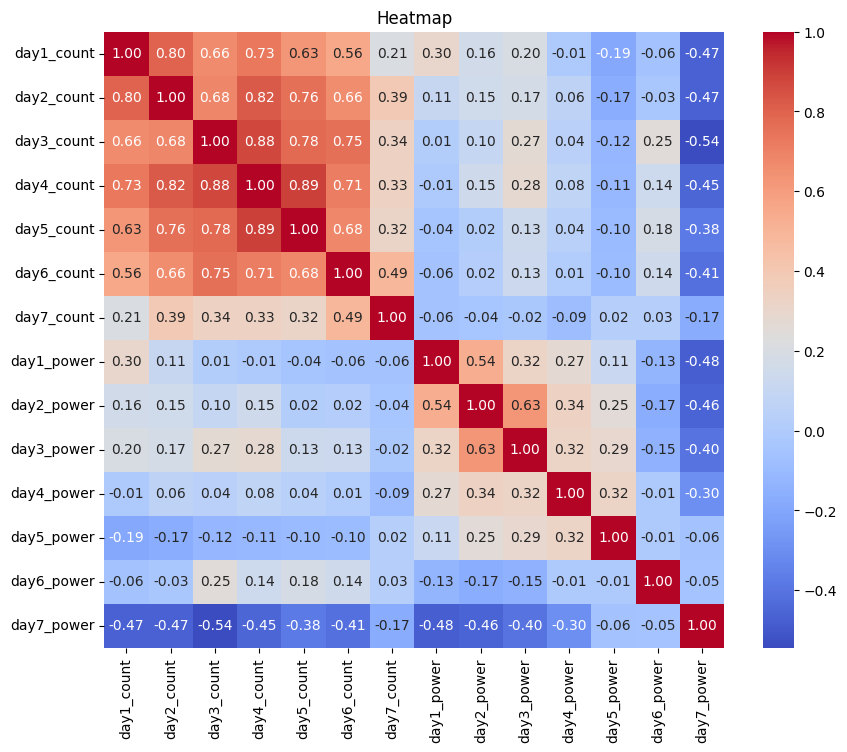

In [56]:
# Specify the proposal(s) you want to analyze
selected_proposals = ['UniDex STIP Proposal - Round 1']

# Filter the dataset for the selected proposals
filtered_data = data2[data2['proposal_title'].isin(selected_proposals)]

# Select specific columns for heatmap
columns_for_heatmap = ['day1_count', 'day2_count', 'day3_count', 'day4_count', 
                       'day5_count', 'day6_count', 'day7_count', 'day1_power', 
                       'day2_power', 'day3_power', 'day4_power', 'day5_power', 
                       'day6_power', 'day7_power']

# Create a new DataFrame containing only the selected columns
heatmap = data2[columns_for_heatmap]

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

In [57]:
data2['day7_%'].describe()

count    114.000000
mean      13.743772
std        3.435119
min        3.760000
25%       13.085000
50%       14.360000
75%       16.192500
max       18.870000
Name: day7_%, dtype: float64

In [72]:
mean_percent = data2['day7_%'].mean()

# Create a horizontal violin plot
fig = px.violin(x=data2['day7_%'], box=True, points='all', orientation='h')

# Add vertical line for the mean
fig.add_vline(x=mean_percent, line_dash='dash', line_color='red', 
              annotation_text=f'Mean: {mean_percent:.2f}', annotation_position='top right')

# Add title and labels
fig.update_layout(title='Distribution of Percentage of Votes on Last Day',
                  xaxis_title='Percentage of Votes')

# Show plot
fig.show()
fig.write_html(r'Graphs\violin-day7%.html')

In [73]:
data2.columns

Index(['proposal_title', 'day1_count', 'day2_count', 'day3_count',
       'day4_count', 'day5_count', 'day6_count', 'day7_count', 'total_votes',
       'day1_%', 'day2_%', 'day3_%', 'day4_%', 'day5_%', 'day6_%', 'day7_%',
       'day1_power', 'day2_power', 'day3_power', 'day4_power', 'day5_power',
       'day6_power', 'day7_power', 'total_voting_power'],
      dtype='object')

In [77]:
# Calculate the percentage of voting power for each day
for day in range(1, 8):
    day_column = f'day{day}_power'
    percentage_column = f'day{day}_power%'
    data2[percentage_column] = round((data2[day_column] / data2['total_voting_power']) * 100, 2)

In [78]:
data2.columns

Index(['proposal_title', 'day1_count', 'day2_count', 'day3_count',
       'day4_count', 'day5_count', 'day6_count', 'day7_count', 'total_votes',
       'day1_%', 'day2_%', 'day3_%', 'day4_%', 'day5_%', 'day6_%', 'day7_%',
       'day1_power', 'day2_power', 'day3_power', 'day4_power', 'day5_power',
       'day6_power', 'day7_power', 'total_voting_power', 'day1_power%',
       'day2_power%', 'day3_power%', 'day4_power%', 'day5_power%',
       'day6_power%', 'day7_power%'],
      dtype='object')

In [79]:
data2[['proposal_title', 'day1_power%','day2_power%', 
       'day3_power%', 'day4_power%', 'day5_power%',
       'day6_power%', 'day7_power%', 'total_voting_power']]

,proposal_title,day1_power%,day2_power%,day3_power%,day4_power%,day5_power%,day6_power%,day7_power%,total_voting_power
0,[Non-Constitutional]: Arbitrum Stable Treasury...,16.16,3.99,4.77,1.21,2.82,17.82,53.22,1.327322e+08
1,Procurement Framework | Security : Non-Constit...,2.04,2.00,1.63,4.73,3.09,37.87,48.65,1.520197e+08
2,Proposal to Backfund Successful STIP Proposals,2.80,3.20,6.30,8.69,9.98,4.80,64.24,1.956426e+08
3,Consolidate Security Proposals into a RFP Process,3.33,8.40,19.39,11.10,16.22,2.50,39.06,1.875428e+08
4,UniDex STIP Proposal - Round 1,5.64,1.11,1.67,1.89,1.79,16.48,71.42,1.225229e+08
...,...,...,...,...,...,...,...,...,...
109,Proposal: Activate support for account abstrac...,16.82,4.47,3.12,31.51,2.60,6.08,35.41,6.070424e+07
110,AIP-1.2 - Foundation and DAO Governance,69.63,8.77,5.05,5.80,2.56,3.95,4.25,1.387616e+08
111,"AIP-1.1 - Lockup, Budget, Transparency",70.02,9.34,4.61,6.06,1.74,4.05,4.18,1.396229e+08
112,AIP 1.05: Return 700M $ARB to the DAO Treasury...,10.18,23.32,39.05,13.24,4.67,3.97,5.56,1.408547e+08


In [80]:
data2['day7_power%'].describe()

count    114.000000
mean      53.692018
std       21.499526
min        3.140000
25%       38.342500
50%       55.130000
75%       73.760000
max       86.590000
Name: day7_power%, dtype: float64

In [81]:
mean_percent = data2['day7_power%'].mean()

# Create a horizontal violin plot
fig = px.violin(x=data2['day7_power%'], box=True, points='all', orientation='h')

# Add vertical line for the mean
fig.add_vline(x=mean_percent, line_dash='dash', line_color='red', 
              annotation_text=f'Mean: {mean_percent:.2f}', annotation_position='top right')

# Add title and labels
fig.update_layout(title='Distribution of Percentage of Voting Power on Last Day',
                  xaxis_title='Percentage of Voting Power')

# Show plot
fig.show()
fig.write_html(r'Graphs\violin-day7-power%.html')